In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from CSV files
tripsdetails_df = pd.read_csv("C:/Users/DELL'/Music/Uber/Uber Trip Details.csv")
locations_df = pd.read_csv("C:/Users/DELL'/Music/Uber/Location Table.csv")

print("Trips Details:")
print(tripsdetails_df.head())

print("\nLocations Data:")
print(locations_df.head())


Trips Details:
   Trip_id       Pickup_time      DropOff_time  passenger_count  \
0        1  01-06-2024 00:42  01-06-2024 01:04                1   
1        2  01-06-2024 00:06  01-06-2024 00:13                1   
2        3  01-06-2024 00:08  01-06-2024 00:21                1   
3        4  01-06-2024 00:28  01-06-2024 00:37                1   
4        5  01-06-2024 00:38  01-06-2024 00:45                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  surge_fee  \
0           5.60            79           226         19.5        2.0   
1           1.72           142           186          8.0        0.0   
2           3.41           229           238         13.0        0.0   
3           1.81           188            35          9.0        0.0   
4           1.89           100           137          8.0        0.0   

      Vehicle Payment_type  
0       UberX     Uber Pay  
1  Uber Black         Cash  
2  Uber Black         Cash  
3       UberX         Cash  
4  U

In [3]:
# Converting Pickup and Dropoff times — with correct format
tripsdetails_df['Pickup_time'] = pd.to_datetime(tripsdetails_df['Pickup_time'], dayfirst=True, errors='coerce')
tripsdetails_df['DropOff_time'] = pd.to_datetime(tripsdetails_df['DropOff_time'], dayfirst=True, errors='coerce')



In [4]:
# Check for invalid/missing dates 
invalid_rows = tripsdetails_df[tripsdetails_df['Pickup_time'].isna() | tripsdetails_df['DropOff_time'].isna()]
print(" Invalid datetime rows (if any):\n", invalid_rows)

 Invalid datetime rows (if any):
 Empty DataFrame
Columns: [Trip_id, Pickup_time, DropOff_time, passenger_count, trip_distance, PULocationID, DOLocationID, fare_amount, surge_fee, Vehicle, Payment_type]
Index: []


In [5]:

tripsdetails_df['Trip_Duration_Minutes'] = (tripsdetails_df['DropOff_time'] - tripsdetails_df['Pickup_time']).dt.total_seconds() / 60
tripsdetails_df['booking_value'] = tripsdetails_df['fare_amount'] + tripsdetails_df['surge_fee']


###  KPI Calculation

In [7]:

total_bookings = tripsdetails_df['Trip_id'].nunique()
total_value = tripsdetails_df['booking_value'].sum()
average_value = tripsdetails_df['booking_value'].mean()
total_distance = tripsdetails_df['trip_distance'].sum()
average_distance = tripsdetails_df['trip_distance'].mean()
average_duration = tripsdetails_df['Trip_Duration_Minutes'].mean()


print("\n UBER TRIP DASHBOARD KPIs:")
print(f" Total Bookings: {total_bookings}")
print(f" Total Booking Value: {round(total_value, 2)}")
print(f" Average Booking Value: {round(average_value, 2)}")
print(f" Total Trip Distance: {round(total_distance, 2)} km")
print(f" Average Trip Distance: {round(average_distance, 2)} km")
print(f" Average Trip Duration: {round(average_duration, 2)} minutes")



 UBER TRIP DASHBOARD KPIs:
 Total Bookings: 103728
 Total Booking Value: 1553672.81
 Average Booking Value: 14.98
 Total Trip Distance: 348933.81 km
 Average Trip Distance: 3.36 km
 Average Trip Duration: 15.86 minutes


### By Payment Type

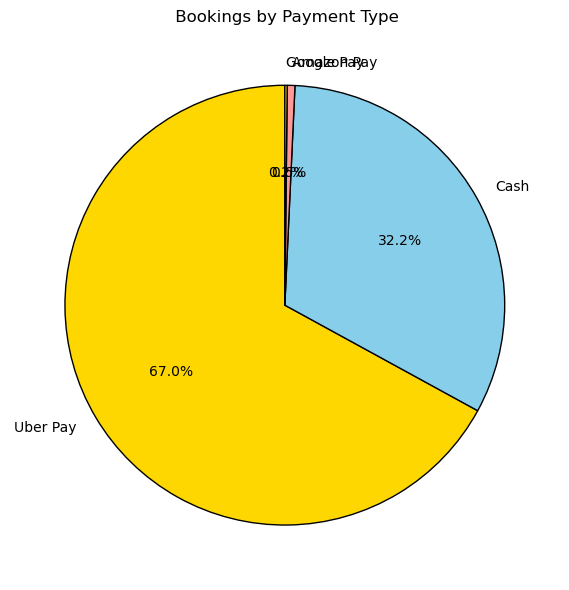

In [8]:
# Group by Payment Type
payment_counts = tripsdetails_df['Payment_type'].value_counts()


plt.figure(figsize=(6, 6))
payment_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["#FFD700", "#87CEEB", "#FF9999"],
    wedgeprops={'edgecolor': 'black'}
)

plt.title(" Bookings by Payment Type")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Vehicle Type Analysis

In [9]:

tripsdetails_df['booking_value'] = tripsdetails_df['fare_amount'] + tripsdetails_df['surge_fee']

#  Group by Vehicle 
vehicle_summary = tripsdetails_df.groupby("Vehicle").agg(
    Total_Bookings=("Trip_id", "count"),
    Total_Booking_Value=("booking_value", "sum"),
    Total_Trip_Distance=("trip_distance", "sum")
).reset_index()


vehicle_summary = vehicle_summary.round(2)


print(" Vehicle Type Summary:")
print(vehicle_summary)

🚗 Vehicle Type Summary:
        Vehicle  Total_Bookings  Total_Booking_Value  Total_Trip_Distance
0    Uber Black           16710            250192.46             56149.26
1  Uber Comfort           17078            253995.49             56790.29
2    Uber Green           14498            216180.79             48777.52
3         UberX           38744            583879.64            131496.06
4        UberXL           16698            249424.43             55720.68


### Payment Type

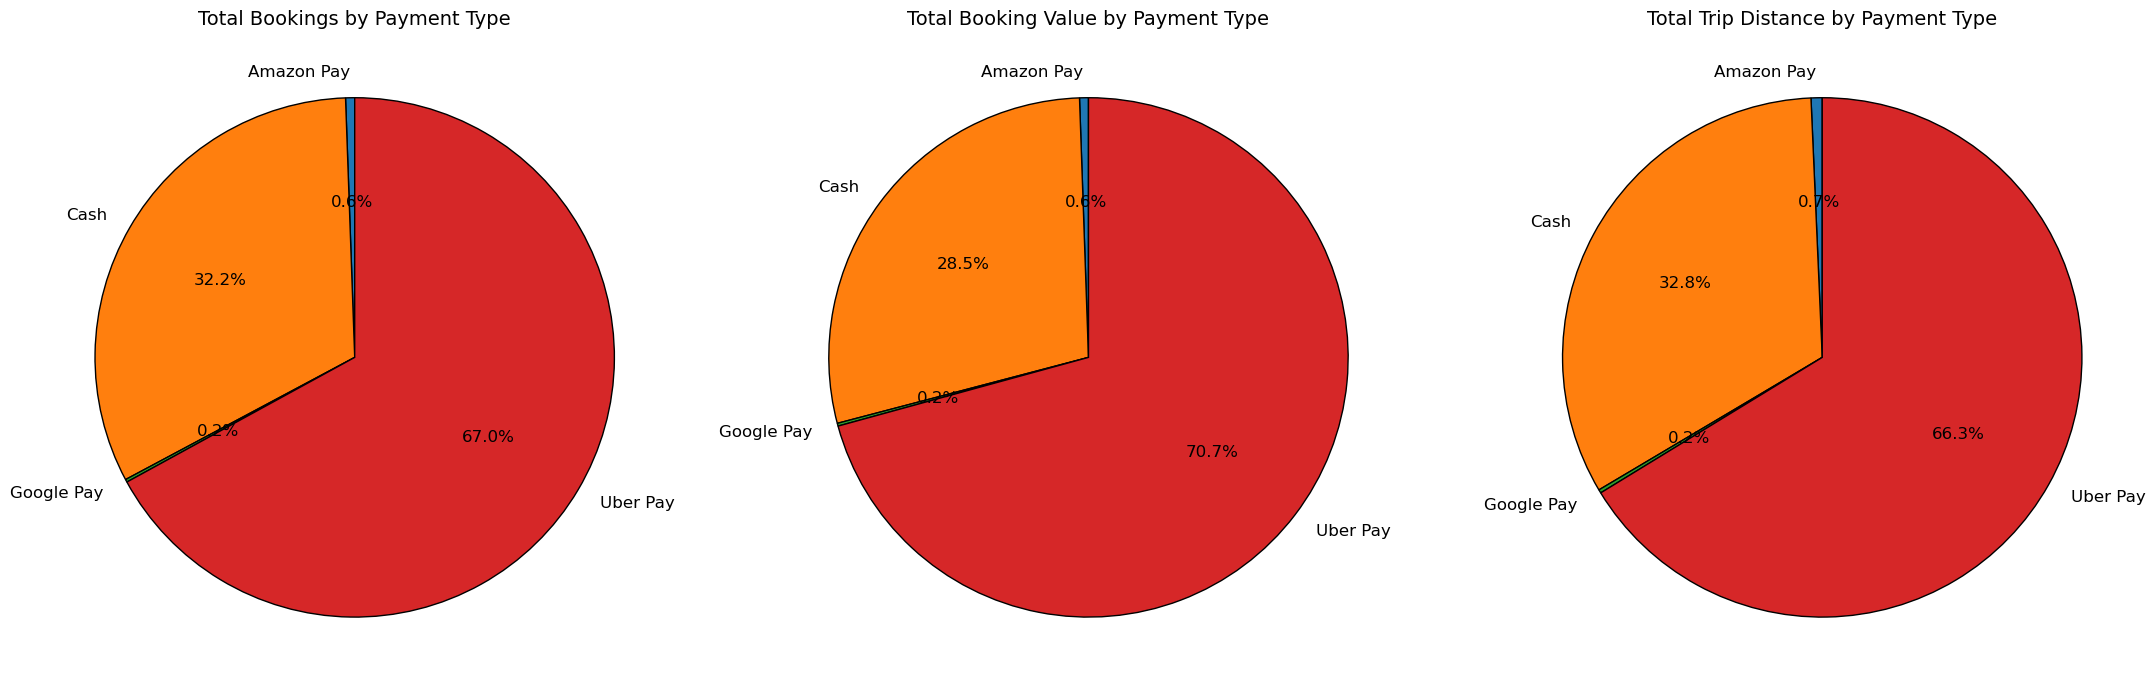

In [10]:
tripsdetails_df['booking_value'] = tripsdetails_df['fare_amount'] + tripsdetails_df['surge_fee']

#  summary by Payment_type
payment_summary = tripsdetails_df.groupby("Payment_type").agg(
    Total_Bookings=("Trip_id", "count"),
    Total_Booking_Value=("booking_value", "sum"),
    Total_Trip_Distance=("trip_distance", "sum")
).reset_index()


fig, axs = plt.subplots(1, 3, figsize=(22, 8))  # Increased figsize

# Pie 1: Total Bookings
axs[0].pie(payment_summary["Total_Bookings"], labels=payment_summary["Payment_type"],
           autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
axs[0].set_title("Total Bookings by Payment Type", fontsize=14)

# Pie 2: Total Booking Value
axs[1].pie(payment_summary["Total_Booking_Value"], labels=payment_summary["Payment_type"],
           autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
axs[1].set_title("Total Booking Value by Payment Type", fontsize=14)

# Pie 3: Total Trip Distance
axs[2].pie(payment_summary["Total_Trip_Distance"], labels=payment_summary["Payment_type"],
           autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
axs[2].set_title("Total Trip Distance by Payment Type", fontsize=14)

plt.tight_layout()
plt.show()

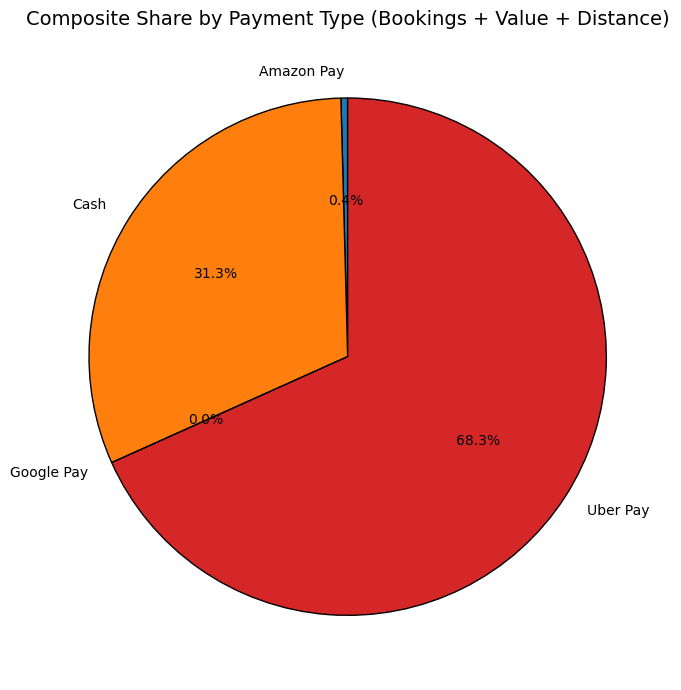

In [11]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_metrics = scaler.fit_transform(payment_summary[["Total_Bookings", "Total_Booking_Value", "Total_Trip_Distance"]])

payment_summary["Composite_Score"] = scaled_metrics.sum(axis=1)

plt.figure(figsize=(7, 7))
plt.pie(payment_summary["Composite_Score"], labels=payment_summary["Payment_type"],
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Composite Share by Payment Type (Bookings + Value + Distance)", fontsize=14)
plt.tight_layout()
plt.show()


###  Day vs Night

In [ ]:
#  Adding Trip_Type column
tripsdetails_df["Trip_Type"] = tripsdetails_df["Pickup_time"].dt.hour.apply(
    lambda h: "Day" if 6 <= h <= 17 else "Night"
)

trip_type_summary = tripsdetails_df.groupby("Trip_Type").agg(
    Total_Bookings=("Trip_id", "count"),
    Total_Booking_Value=("booking_value", "sum"),
    Average_Booking_Value=("booking_value", "mean"),
    Total_Trip_Distance=("trip_distance", "sum")
).reset_index()


trip_type_summary = trip_type_summary.round(2)

print(" Day vs Night Summary:\n", trip_type_summary)


#### Bookings by Day vs Night

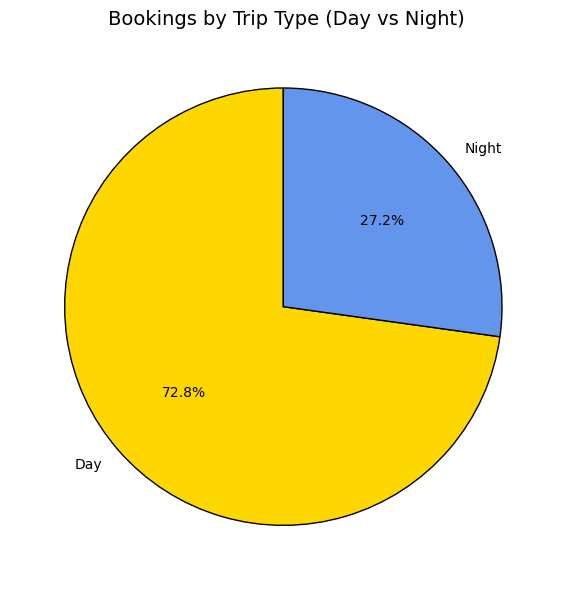

In [13]:
#To Classify as Day or Night
tripsdetails_df["Trip_Type"] = tripsdetails_df["Pickup_time"].dt.hour.apply(
    lambda h: "Day" if 6 <= h <= 17 else "Night"
)

# Group and count
trip_type_counts = tripsdetails_df["Trip_Type"].value_counts()

plt.figure(figsize=(6, 6))
trip_type_counts.plot.pie(
    autopct='%1.1f%%',
    labels=trip_type_counts.index,
    colors=["#FFD700", "#6495ED"],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title(" Bookings by Trip Type (Day vs Night)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Total Booking Value and Total Trip Distance by Day/Night

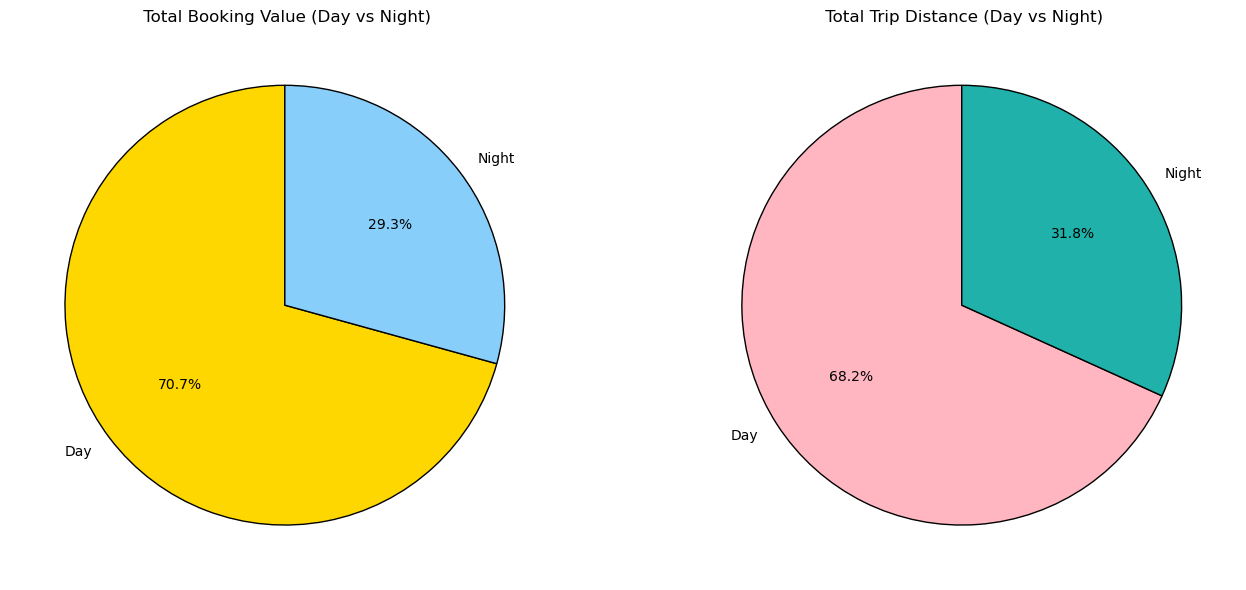

In [14]:
# 1️ Total Booking Value by Day/Night
value_by_triptype = tripsdetails_df.groupby("Trip_Type")["booking_value"].sum()

# 2️ Total Trip Distance by Day/Night
distance_by_triptype = tripsdetails_df.groupby("Trip_Type")["trip_distance"].sum()


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie 1: Booking Value
axs[0].pie(value_by_triptype, labels=value_by_triptype.index,
           autopct='%1.1f%%', startangle=90, colors=["#FFD700", "#87CEFA"],
           wedgeprops={'edgecolor': 'black'})
axs[0].set_title(" Total Booking Value (Day vs Night)")

# Pie 2: Trip Distance
axs[1].pie(distance_by_triptype, labels=distance_by_triptype.index,
           autopct='%1.1f%%', startangle=90, colors=["#FFB6C1", "#20B2AA"],
           wedgeprops={'edgecolor': 'black'})
axs[1].set_title(" Total Trip Distance (Day vs Night)")

plt.tight_layout()
plt.show()


#### Total Bookings by Day

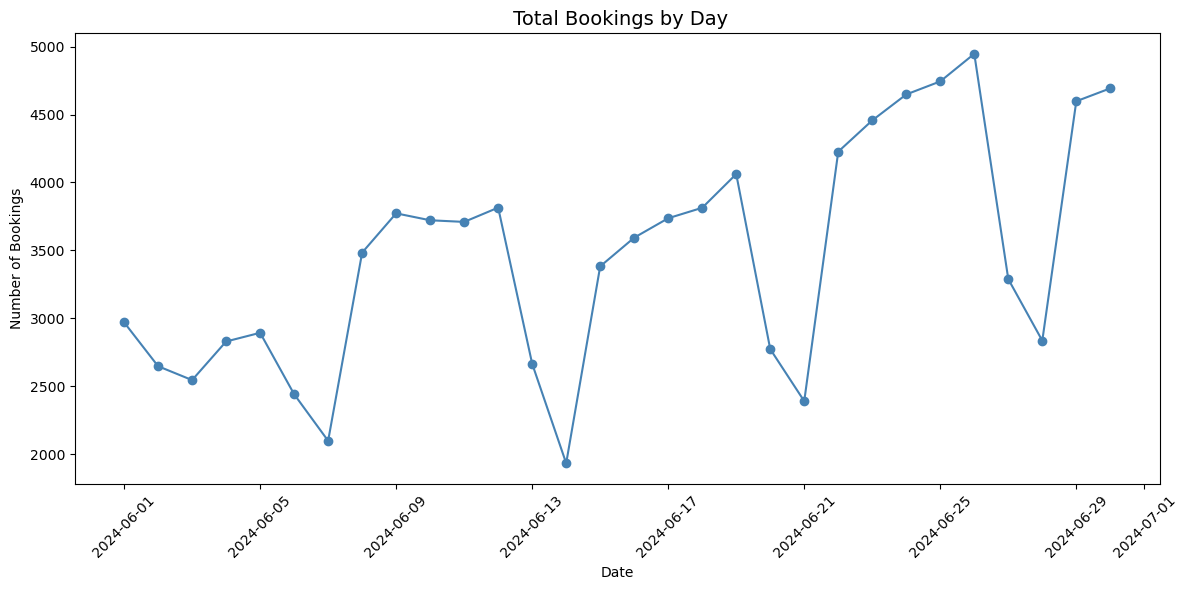

In [15]:
import matplotlib.pyplot as plt

#  To Extract date
tripsdetails_df["Trip_Date"] = tripsdetails_df["Pickup_time"].dt.date

#  Group and count
daily_bookings = tripsdetails_df.groupby("Trip_Date")["Trip_id"].count().reset_index()
daily_bookings.columns = ["Trip_Date", "Total_Bookings"]

plt.figure(figsize=(12, 6))
plt.plot(daily_bookings["Trip_Date"], daily_bookings["Total_Bookings"], marker='o', color="#4682B4")

plt.title(" Total Bookings by Day", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 5 Pickup Locations

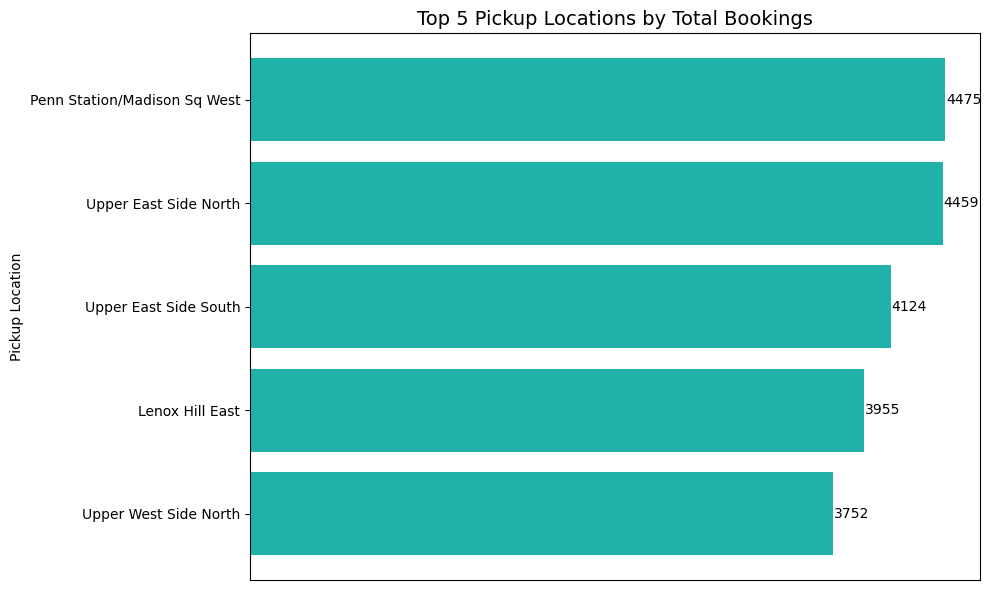

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(top5_pickups["Pickup_Location"], top5_pickups["Total_Bookings"], color="#20B2AA")


plt.gca().xaxis.set_visible(False)


for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, str(width), va='center', fontsize=10)


plt.title("Top 5 Pickup Locations by Total Bookings", fontsize=14)
plt.ylabel("Pickup Location")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Most Preferred vehicle for Location Pickup

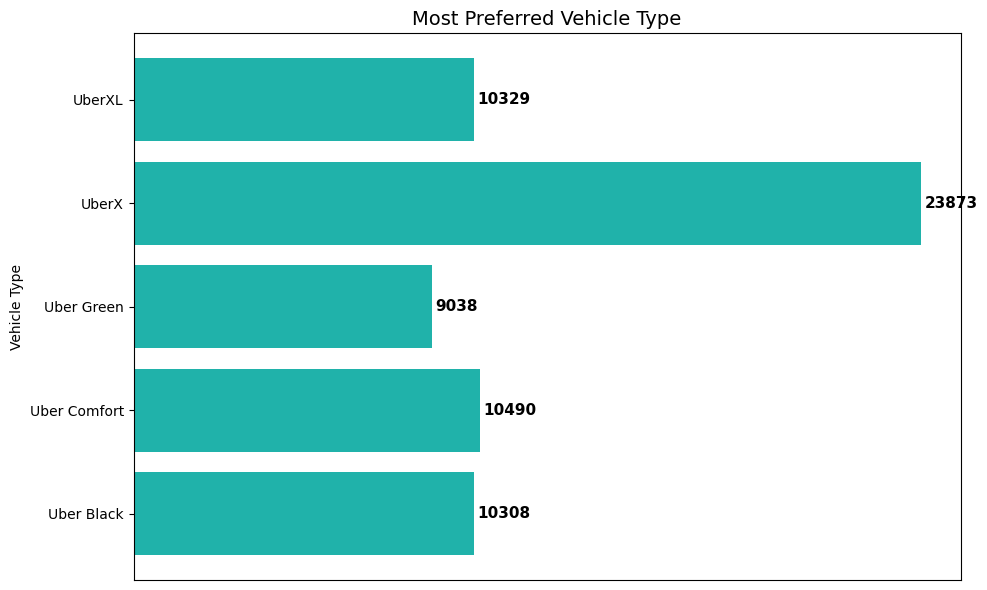

In [24]:
import matplotlib.pyplot as plt

pickup_with_city = tripsdetails_df.merge(locations_df, how='left', left_on='PULocationID', right_on='LocationID')

vehicle_city_group = pickup_with_city.groupby(["Vehicle", "City"])["Trip_id"].count().reset_index(name="Total_Trips")


top_city_by_vehicle = vehicle_city_group.sort_values(['Vehicle', 'Total_Trips'], ascending=[True, False])
top_city_by_vehicle = top_city_by_vehicle.groupby("Vehicle").head(1).reset_index(drop=True)


plt.figure(figsize=(10, 6))
bars = plt.barh(top_city_by_vehicle["Vehicle"], top_city_by_vehicle["Total_Trips"], color="#20B2AA")


for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=11, fontweight='bold')


plt.title("Most Preferred Vehicle Type", fontsize=14)
plt.ylabel("Vehicle Type")
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()


####  Most Frequent Drop-off Location

In [25]:

dropoff_merged = tripsdetails_df.merge(locations_df, how='left', left_on='DOLocationID', right_on='LocationID')
dropoff_merged = dropoff_merged.rename(columns={"Location": "Dropoff_Location"})


dropoff_summary = dropoff_merged.groupby("Dropoff_Location")["Trip_id"].count().reset_index()
dropoff_summary.columns = ["Dropoff_Location", "Total_Trips"]

top_dropoff = dropoff_summary.sort_values(by="Total_Trips", ascending=False).head(1)


print(" Most Frequent Drop-off Location:")
print(top_dropoff)

 Most Frequent Drop-off Location:
          Dropoff_Location  Total_Trips
227  Upper East Side North         4024


#### Farthest Trip Details

In [28]:

pickup_merged = tripsdetails_df.merge(locations_df, how='left', left_on='PULocationID', right_on='LocationID')
pickup_merged = pickup_merged.rename(columns={"Location": "Pickup_Location", "City": "Pickup_City"})


fully_merged = pickup_merged.merge(locations_df, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=('', '_Drop'))



if "Location_Drop" in fully_merged.columns:
    fully_merged = fully_merged.rename(columns={"Location_Drop": "Dropoff_Location"})
if "City_Drop" in fully_merged.columns:
    fully_merged = fully_merged.rename(columns={"City_Drop": "Dropoff_City"})


farthest_trip = fully_merged.sort_values(by="trip_distance", ascending=False).head(1)

available_columns = [col for col in [
    "Trip_id", "Pickup_time", "DropOff_time", "trip_distance", "Vehicle", "Payment_type",
    "passenger_count", "fare_amount", "surge_fee",
    "Pickup_Location", "Dropoff_Location", "Pickup_City", "Dropoff_City"
] if col in farthest_trip.columns]

farthest_trip_details = farthest_trip[available_columns]


print("\n Farthest Trip Details:")
print(farthest_trip_details)



 Farthest Trip Details:
       Trip_id         Pickup_time        DropOff_time  trip_distance Vehicle  \
92204   103565 2024-06-28 10:50:00 2024-06-28 19:42:00          144.1   UberX   

      Payment_type  passenger_count  fare_amount  surge_fee  Pickup_Location  \
92204     Uber Pay                1       563.79        0.0  Lower East Side   

      Pickup_City  
92204      Queens  


#### Booking by 10 Min Interval

In [ ]:
#  Pickup_time to nearest 10 minutes
tripsdetails_df["Rounded_10Min"] = tripsdetails_df["Pickup_time"].dt.floor("10min")

#  Extracting time in HH:MM format
tripsdetails_df["Time_Interval"] = tripsdetails_df["Rounded_10Min"].dt.strftime("%H:%M")

#  Group and count
interval_summary = tripsdetails_df.groupby("Time_Interval")["Trip_id"].count().reset_index()
interval_summary.columns = ["Time_Interval", "Total_Bookings"]


interval_summary = interval_summary.sort_values("Time_Interval")


plt.figure(figsize=(14, 6))
plt.plot(interval_summary["Time_Interval"], interval_summary["Total_Bookings"], color="#FF6347", marker='o')
plt.title(" Bookings by 10-Minute Intervals", fontsize=14)
plt.xlabel("Time Interval (HH:MM)")
plt.ylabel("Total Bookings")
plt.xticks(rotation=90, fontsize=8)
plt.grid(False)
plt.tight_layout()
plt.show()

#### Total Bookings by day of the week

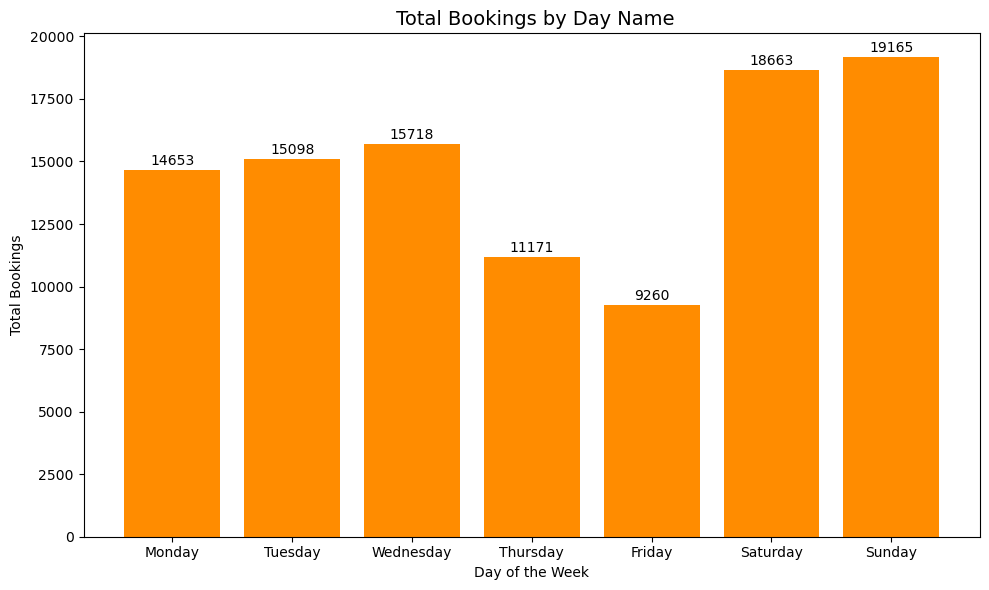

In [31]:
#  Extracting day name 
tripsdetails_df["Day_Name"] = tripsdetails_df["Pickup_time"].dt.day_name()


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#  Group and count
day_summary = tripsdetails_df.groupby("Day_Name")["Trip_id"].count().reindex(day_order).reset_index()
day_summary.columns = ["Day_Name", "Total_Bookings"]


plt.figure(figsize=(10, 6))
bars = plt.bar(day_summary["Day_Name"], day_summary["Total_Bookings"], color="#FF8C00")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f"{int(height)}", ha='center', fontsize=10)


plt.title(" Total Bookings by Day Name", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Total Bookings")
plt.tight_layout()
plt.show()


#### Bookings by Hour & Weekday

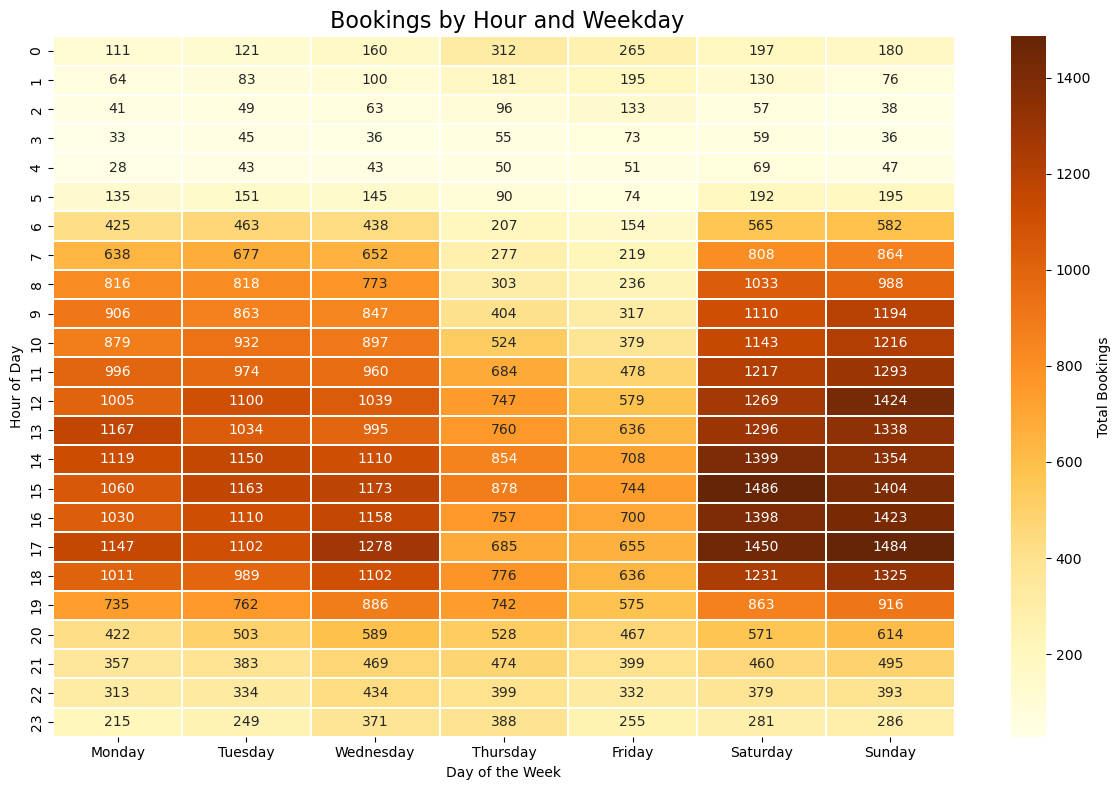

In [32]:

tripsdetails_df["Hour"] = tripsdetails_df["Pickup_time"].dt.hour
tripsdetails_df["Day"] = tripsdetails_df["Pickup_time"].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


heatmap_data = tripsdetails_df.groupby(["Hour", "Day"])["Trip_id"].count().reset_index()
heatmap_pivot = heatmap_data.pivot(index="Hour", columns="Day", values="Trip_id")[day_order]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap="YlOrBr", linewidths=0.3, annot=True, fmt='g', cbar_kws={"label": "Total Bookings"})
plt.title(" Bookings by Hour and Weekday", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
